In [1]:
# https://docs.microsoft.com/en-us/azure/cognitive-services/face/quickstarts/client-libraries?pivots=programming-language-python&tabs=windows

## Info

face_client.face.detect_with_url(url, return_face_id=True, return_face_landmarks=False, return_face_attributes=None, recognition_model='recognition_01', return_recognition_model=False, detection_model='detection_01', custom_headers=None, raw=False, **operation_config)

Detect human faces in an image, return face rectangles, and optionally with faceIds, landmarks, and attributes.

No image will be stored. Only the extracted face feature will be
stored on server. The faceId is an identifier of the face feature and will be used in Face - Identify, Face - Verify, and Face - Find Similar. The stored face feature(s) will expire and be deleted 24 hours after the original detection call.

Optional parameters include faceId, landmarks, and attributes.
Attributes include age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup, occlusion, accessories, blur, exposure and noise. Some of the results returned for specific attributes may not be highly accurate.

JPEG, PNG, GIF (the first frame), and BMP format are supported. The
allowed image file size is from 1KB to 6MB.

Up to 100 faces can be returned for an image. Faces are ranked by
face rectangle size from large to small.

For optimal results when querying Face -
Identify, Face - Verify, and Face - Find Similar ('returnFaceId' is true), please use faces that are: frontal, clear, and with a minimum size of 200x200 pixels (100 pixels between eyes).

The minimum detectable face size is 36x36 pixels in an image no
larger than 1920x1080 pixels. Images with dimensions higher than

1920x1080 pixels will need a proportionally larger minimum face size.

Different 'detectionModel' values can be provided. To use and compare
different detection models, please refer to How to specify a detection model | Model | Recommended use-case(s) | | ---------- | -------- | | 'detection_01': | The default detection model for Face - Detect. Recommend for near frontal face detection. For scenarios with exceptionally large angle (head-pose) faces, occluded faces or wrong image orientation, the faces in such cases may not be detected. | | 'detection_02': | Detection model released in 2019 May with improved accuracy especially on small, side and blurry faces. |

Different 'recognitionModel' values are provided. If follow-up
operations like Verify, Identify, Find Similar are needed, please specify the recognition model with 'recognitionModel' parameter. The default value for 'recognitionModel' is 'recognition_01', if latest model needed, please explicitly specify the model you need in this parameter. Once specified, the detected faceIds will be associated with the specified recognition model. More details, please refer to How to specify a recognition model | Model | Recommended use-case(s) | | ---------- | -------- | | 'recognition_01': | The default recognition model for Face - Detect. All those faceIds created before 2019 March are bonded with this recognition model. | | 'recognition_02': | Recognition model released in 2019 March. 'recognition_02' is recommended since its overall accuracy is improved compared with 'recognition_01'. |.

:param url: Publicly reachable URL of an image :type url: str :param return_face_id: A value indicating whether the operation should

return faceIds of detected faces.
:type return_face_id: bool :param return_face_landmarks: A value indicating whether the operation

should return landmarks of the detected faces.
:type return_face_landmarks: bool :param return_face_attributes: Analyze and return the one or more

specified face attributes in the comma-separated string like
"returnFaceAttributes=age,gender". Supported face attributes include
age, gender, headPose, smile, facialHair, glasses and emotion. Note
that each face attribute analysis has additional computational and
time cost.
:type return_face_attributes: list[str or

~azure.cognitiveservices.vision.face.models.FaceAttributeType]
:param recognition_model: Name of recognition model. Recognition model

is used when the face features are extracted and associated with
detected faceIds, (Large)FaceList or (Large)PersonGroup. A recognition
model name can be provided when performing Face - Detect or
(Large)FaceList - Create or (Large)PersonGroup - Create. The default
value is 'recognition_01', if latest model needed, please explicitly
specify the model you need. Possible values include: 'recognition_01',
'recognition_02'
:type recognition_model: str or

~azure.cognitiveservices.vision.face.models.RecognitionModel
:param return_recognition_model: A value indicating whether the

operation should return 'recognitionModel' in response.
:type return_recognition_model: bool :param detection_model: Name of detection model. Detection model is

used to detect faces in the submitted image. A detection model name
can be provided when performing Face - Detect or (Large)FaceList - Add
Face or (Large)PersonGroup - Add Face. The default value is
'detection_01', if another model is needed, please explicitly specify
it. Possible values include: 'detection_01', 'detection_02'
:type detection_model: str or

~azure.cognitiveservices.vision.face.models.DetectionModel
:param dict custom_headers: headers that will be added to the request :param bool raw: returns the direct response alongside the

deserialized response
:param operation_config: :ref:`Operation configuration

overrides msrest:optionsforoperations `.
:return: list or ClientRawResponse if raw=true :rtype: list[~azure.cognitiveservices.vision.face.models.DetectedFace]

or ~msrest.pipeline.ClientRawResponse
:raises:

:class:APIErrorException azure.cognitiveservices.vision.face.models.APIErrorException

In [14]:
# download if necessary
# !pip install cognitive_face
# !pip install azure.cognitiveservices.vision.face

# install libraries
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person, SnapshotObjectType, OperationStatusType
import pandas as pd 
from PIL import Image
import numpy as np 
from IPython.display import clear_output
import matplotlib as plt
%matplotlib inline
import seaborn as sns

#import libraries
import json
import matplotlib.pyplot as plt

import requests

# from azure.cognitiveservices.vision.computervision import ComputerVisionClient
# from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes

# from msrest.authentication import CognitiveServicesCredentials
# from PIL import Image

#allow images to be displayed inline in the notebook
# %matplotlib inline

In [3]:
# Set the FACE_SUBSCRIPTION_KEY environment variable with your key as the value.
# This key will serve all examples in this document.
KEY = os.environ['FACE_SUBSCRIPTION_KEY']

# Set the FACE_ENDPOINT environment variable with the endpoint from your Face service in Azure.
# This endpoint will be used in all examples in this quickstart.
ENDPOINT = os.environ['FACE_ENDPOINT']


## Helpful Documentation

Packages, models, operations, version, Classes (FaceClient, FaceClientConfiguration) - https://docs.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-face/azure.cognitiveservices.vision.face?view=azure-python *

In [4]:
# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))


## Example 
### Detect faces in an image

The following code detects a face in a remote image. It prints the detected face's ID to the console and also stores it in program memory. Then, it detects the faces in an image with multiple people and prints their IDs to the console as well. By changing the parameters in the detect_with_url method, you can return different information with each DetectedFace object.

See the sample code on GitHub for more detection scenarios.

https://github.com/Azure-Samples/cognitive-services-quickstart-code/blob/master/python/Face/FaceQuickstart.py

In [5]:
# Detect a face in an image that contains a single face
single_face_image_url = 'https://www.biography.com/.image/t_share/MTQ1MzAyNzYzOTgxNTE0NTEz/john-f-kennedy---mini-biography.jpg'
single_image_name = os.path.basename(single_face_image_url)
detected_faces = face_client.face.detect_with_url(url=single_face_image_url)
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Display the detected face ID in the first single-face image.
# Face IDs are used for comparison to faces (their IDs) detected in other images.
print('Detected face ID from', single_image_name, ':')
for face in detected_faces: print (face.face_id)
print()

# Save this ID for use in Find Similar
first_image_face_ID = detected_faces[0].face_id

Detected face ID from john-f-kennedy---mini-biography.jpg :
1517cb77-12c1-4fc6-bd55-7e8db79816ee



## Another Example
### Display and frame faces¶
The following code outputs the given image to the display and draws rectangles around the faces, using the DetectedFace.faceRectangle property.

In [6]:
# Detect a face in an image that contains a single face
single_face_image_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'
single_image_name = os.path.basename(single_face_image_url)
detected_faces = face_client.face.detect_with_url(url=single_face_image_url)
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))


# Download the image from the url
response = requests.get(single_face_image_url)
img = Image.open(BytesIO(response.content))

# For each face returned use the face rectangle and draw a red box.
print('Drawing rectangle around face... see popup for results.')
draw = ImageDraw.Draw(img)
for face in detected_faces:
    draw.rectangle(getRectangle(face), outline='red')

# Display the image in the users default image browser.
img.show()


Drawing rectangle around face... see popup for results.


## Test getting emotions

In [7]:
# face_client.face.detect_with_url()

test = face_client.face.detect_with_url(url=single_face_image_url, return_face_id=True, return_face_landmarks=True, return_face_attributes=['age', 'gender', 'headPose', 'smile', 'facialHair', 'glasses', 'emotion', 'hair', 'makeup', 'occlusion', 'accessories', 'blur', 'exposure', 'noise'], recognition_model='recognition_01', return_recognition_model=True, detection_model='detection_01', custom_headers=None, raw=False)

# face_client.face.models.Emotion()
for face in test:
  print(face.face_attributes.emotion)

{'additional_properties': {}, 'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 1.0, 'neutral': 0.0, 'sadness': 0.0, 'surprise': 0.0}


In [8]:
data_folder = 'emotion_pics/'
emotion_list = os.path.join(data_folder, 'emotion_filelist.csv')
df = pd.read_csv(emotion_list)
df.head()

,id,file_path,emotion
0,1,emotion_pics/angry/10002.jpg,angry
1,2,emotion_pics/angry/10016.jpg,angry
2,3,emotion_pics/angry/10038.jpg,angry
3,4,emotion_pics/angry/10069.jpg,angry
4,5,emotion_pics/angry/10105.jpg,angry


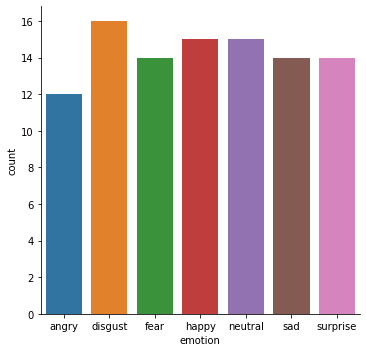

In [9]:
#look at distribution of emotions
sns.catplot(x="emotion", kind="count", data=df)

In [15]:
#save list of picture namees
pic_names = df.file_path

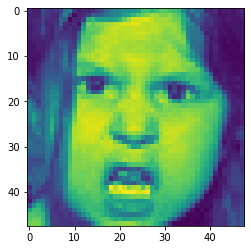

In [20]:
image = Image.open(pic_names[0])
plt.imshow(image)
plt.show()

In [22]:
# face_client.face.detect_with_url()

test = face_client.face.detect_with_stream(, return_face_id=True, return_face_landmarks=True, return_face_attributes=['age', 'gender', 'headPose', 'smile', 'facialHair', 'glasses', 'emotion', 'hair', 'makeup', 'occlusion', 'accessories', 'blur', 'exposure', 'noise'], recognition_model='recognition_01', return_recognition_model=True, detection_model='detection_01', custom_headers=None, raw=False)

# face_client.face.models.Emotion()
for face in test:
  print(face.face_attributes.emotion)

AttributeError: 'JpegImageFile' object has no attribute 'read'

In [11]:
#define a function that wil l display an image in the notebook, with an optional caption
def display_image(image_filename, image_caption=None):
  image = Image.open(image_filename)
  plt.imshow(image)
  plt.axis('off')
  if image_caption != None: #if we need to display a caption for this image
    plt.title(image_caption, size = 'x-large', y=-0.1)
  plt.show()
display_image(pic_names[0])

AttributeError: module 'matplotlib' has no attribute 'imshow'

In [12]:
# face_client.face.detect_with_url()
pic = pic_names[0]
print(pic)
test = face_client.face.detect_with_stream(pic_names[0], return_face_id=True, return_face_landmarks=True, return_face_attributes=['age', 'gender', 'headPose', 'smile', 'facialHair', 'glasses', 'emotion', 'hair', 'makeup', 'occlusion', 'accessories', 'blur', 'exposure', 'noise'], recognition_model='recognition_01', return_recognition_model=True, detection_model='detection_01', custom_headers=None, raw=False)

# face_client.face.models.Emotion()
for face in test:
  print(face.face_attributes.emotion)

emotion_pics/angry/10002.jpg


AttributeError: 'str' object has no attribute 'read'